In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
df=pd.read_csv('brasileiro_tab.csv')
df.set_index('Time',inplace=True)
df['Aproveitamento'] = df['Aproveitamento'].str.replace(',', '.').astype(float)

In [3]:
df.corr().round(3)

,Posicao,Pontos,Vitorias,Empates,Derrotas,Saldo,Aproveitamento
Posicao,1.000,-0.939,-0.916,0.195,0.814,-0.866,-0.939
Pontos,-0.939,1.000,0.973,-0.195,-0.873,0.923,1.000
Vitorias,-0.916,0.973,1.000,-0.418,-0.736,0.879,0.973
Empates,0.195,-0.195,-0.418,1.000,-0.308,-0.099,-0.195
Derrotas,0.814,-0.873,-0.736,-0.308,1.000,-0.846,-0.873
Saldo,-0.866,0.923,0.879,-0.099,-0.846,1.000,0.923
Aproveitamento,-0.939,1.000,0.973,-0.195,-0.873,0.923,1.000


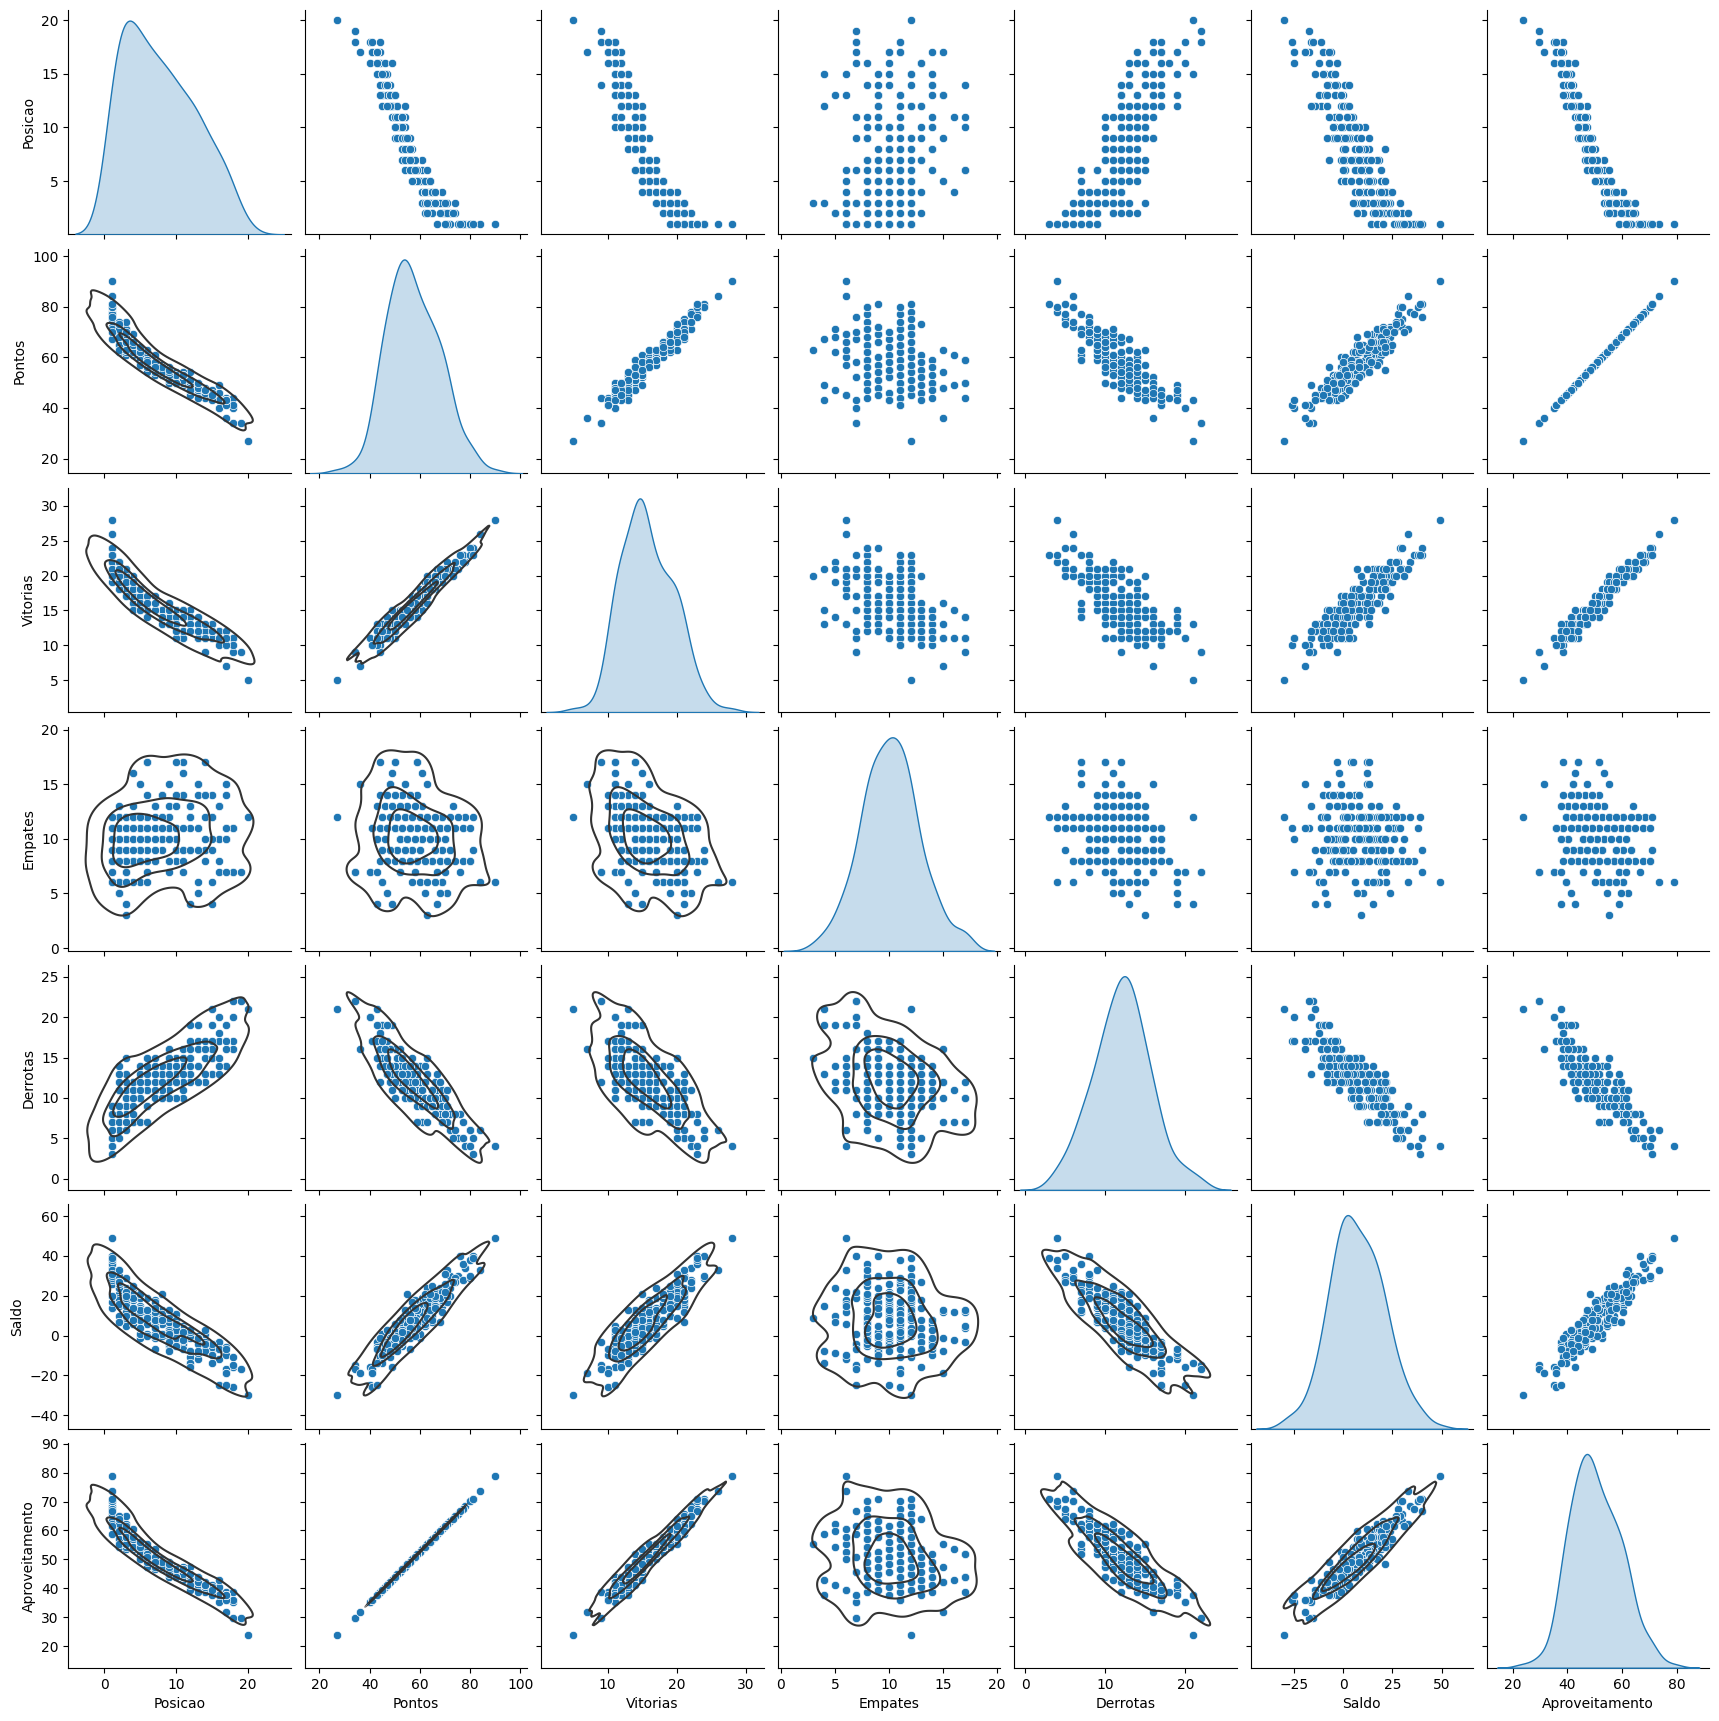

In [4]:
ax=sns.pairplot(df, diag_kind='kde')
ax.map_lower(sns.kdeplot, levels=4, color=".2")
plt.show()

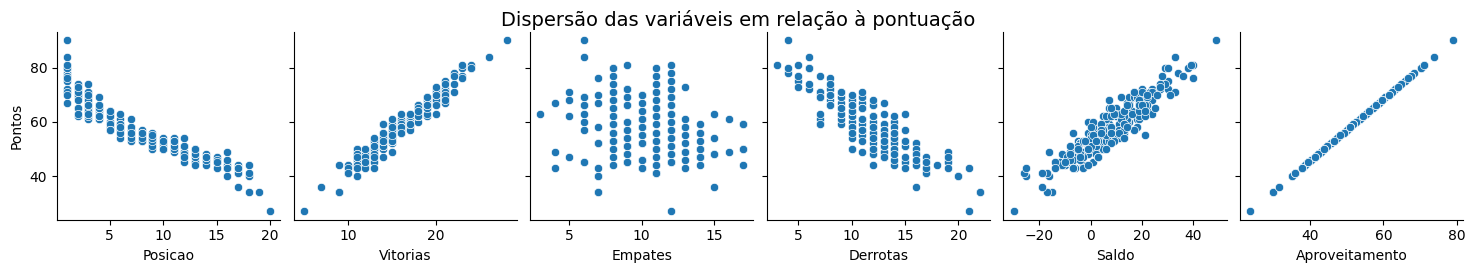

In [5]:
ax = sns.pairplot(df, y_vars='Pontos', x_vars=['Posicao', 'Vitorias', 'Empates', 'Derrotas', 'Saldo', 'Aproveitamento'])
ax.fig.suptitle('Dispersão das variáveis em relação à pontuação', fontsize=14, y=1.05)
plt.show()

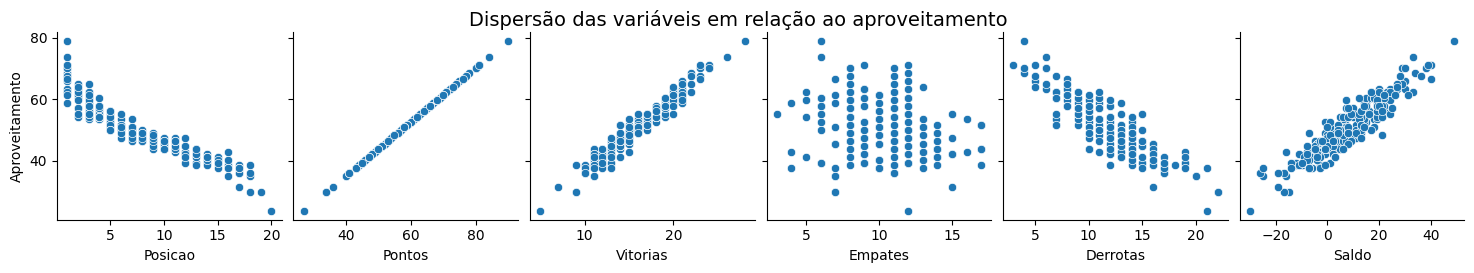

In [6]:
ax = sns.pairplot(df, y_vars='Aproveitamento', x_vars=['Posicao', 'Pontos', 'Vitorias', 'Empates', 'Derrotas', 'Saldo'])
ax.fig.suptitle('Dispersão das variáveis em relação ao aproveitamento', fontsize=14, y=1.05)
plt.show()

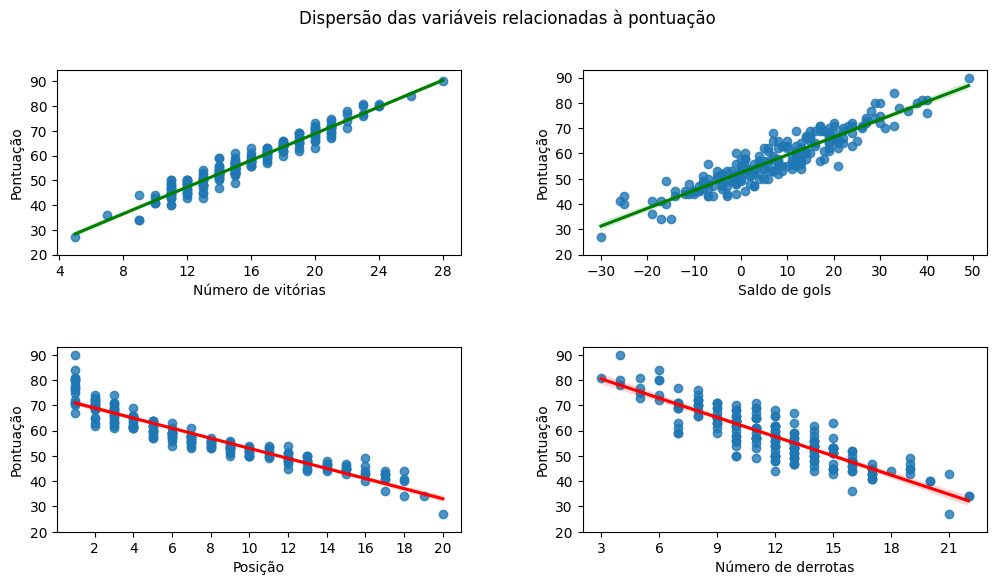

In [7]:
# Criando a figura
fig=plt.figure(figsize=(12, 6))

# Ajustando o espaçamento
fig.subplots_adjust(hspace=0.5, wspace=0.3)

# Adicionando um título geral para os subplots
fig.suptitle('Dispersão das variáveis relacionadas à pontuação')

# Subplots
fig.add_subplot(221)
ax=sns.regplot(x=df.Vitorias,y=df.Pontos,ci=95,line_kws={"color": "green"})
ax.set_xlabel('Número de vitórias')
ax.set_ylabel('Pontuação')
ax.xaxis.set_major_locator(plt.MultipleLocator(4))
plt.yticks(np.arange(20, 100, 10))

fig.add_subplot(222)
ax=sns.regplot(x=df.Saldo,y=df.Pontos,ci=95,line_kws={"color": "green"})
ax.set_xlabel('Saldo de gols')
ax.set_ylabel('Pontuação')
plt.yticks(np.arange(20, 100, 10))

fig.add_subplot(223)
ax=sns.regplot(x=df.Posicao,y=df.Pontos,ci=95,line_kws={"color": "red"})
ax.set_xlabel('Posição')
ax.set_ylabel('Pontuação')
ax.xaxis.set_major_locator(plt.MultipleLocator(2))
plt.yticks(np.arange(20, 100, 10))

fig.add_subplot(224)
ax=sns.regplot(x=df.Derrotas,y=df.Pontos,ci=95,line_kws={"color": "red"})
ax.set_xlabel('Número de derrotas')
ax.set_ylabel('Pontuação')
ax.xaxis.set_major_locator(plt.MultipleLocator(3))
plt.yticks(np.arange(20, 100, 10))

plt.show()

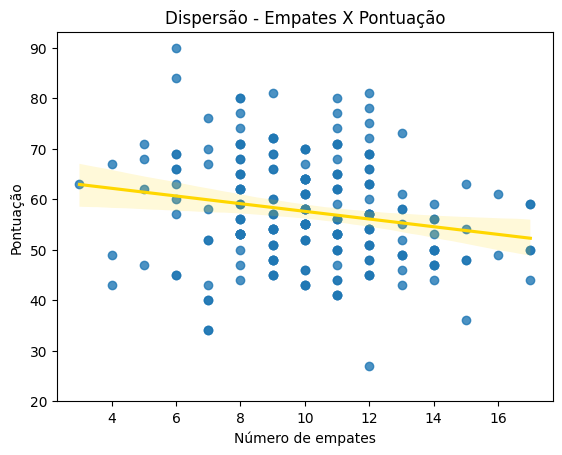

In [8]:
ax=sns.regplot(x=df.Empates,y=df.Pontos,ci=95,line_kws={"color": "gold"})
ax.set_title('Dispersão - Empates X Pontuação')
ax.set_xlabel('Número de empates')
ax.set_ylabel('Pontuação')
plt.yticks(np.arange(20, 100, 10))
plt.show()

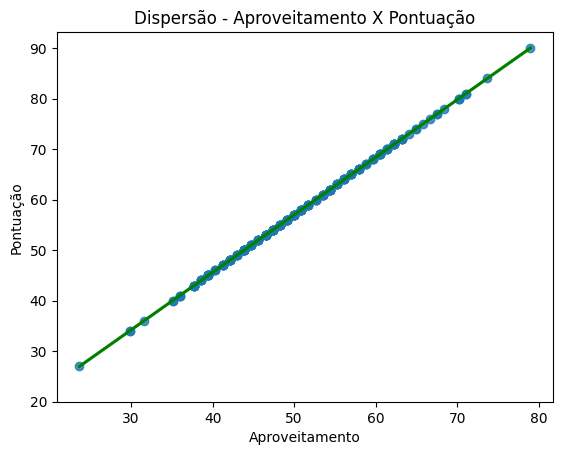

In [9]:
ax=sns.regplot(x=df.Aproveitamento,y=df.Pontos,ci=95,line_kws={"color": "green"})
ax.set_title('Dispersão - Aproveitamento X Pontuação')
ax.set_xlabel('Aproveitamento')
ax.set_ylabel('Pontuação')
plt.yticks(np.arange(20, 100, 10))
plt.show()

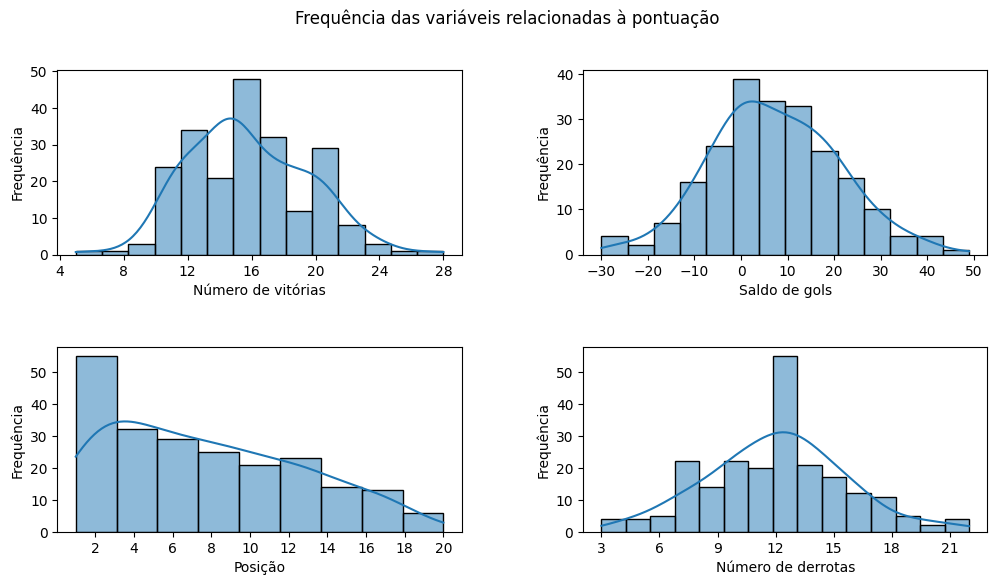

In [10]:
# Criando a figura
fig=plt.figure(figsize=(12, 6))

# Ajustando o espaçamento
fig.subplots_adjust(hspace=0.5, wspace=0.3)

# Adicionando um título geral para os subplots
fig.suptitle('Frequência das variáveis relacionadas à pontuação')

# Subplots
fig.add_subplot(221)
ax=sns.histplot(df.Vitorias,kde=True)
ax.set_xlabel('Número de vitórias')
ax.set_ylabel('Frequência')
ax.xaxis.set_major_locator(plt.MultipleLocator(4))

fig.add_subplot(222)
ax=sns.histplot(df.Saldo,kde=True)
ax.set_xlabel('Saldo de gols')
ax.set_ylabel('Frequência')
ax.xaxis.set_major_locator(plt.MultipleLocator(10))

fig.add_subplot(223)
ax=sns.histplot(df.Posicao,kde=True)
ax.set_xlabel('Posição')
ax.set_ylabel('Frequência')
ax.xaxis.set_major_locator(plt.MultipleLocator(2))

fig.add_subplot(224)
ax=sns.histplot(df.Derrotas,kde=True)
ax.set_xlabel('Número de derrotas')
ax.set_ylabel('Frequência')
ax.xaxis.set_major_locator(plt.MultipleLocator(3))

plt.show()

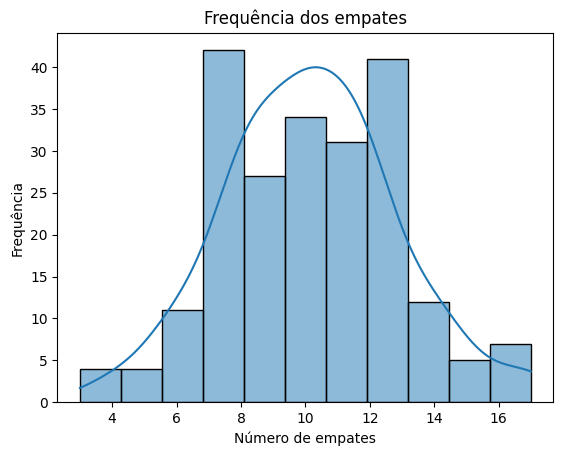

In [11]:
ax=sns.histplot(df.Empates,kde=True)
ax.set_title('Frequência dos empates')
ax.set_xlabel('Número de empates')
ax.set_ylabel('Frequência')

plt.show()

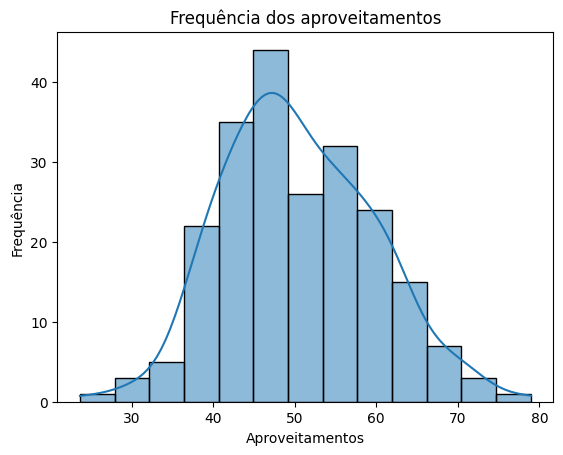

In [12]:
ax=sns.histplot(df.Aproveitamento,kde=True)
ax.set_title('Frequência dos aproveitamentos')
ax.set_xlabel('Aproveitamentos')
ax.set_ylabel('Frequência')

plt.show()

<ipython-input-13-0ffbad7afc66>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Pontos",y="Time",data=df,orient='h',palette='crest')


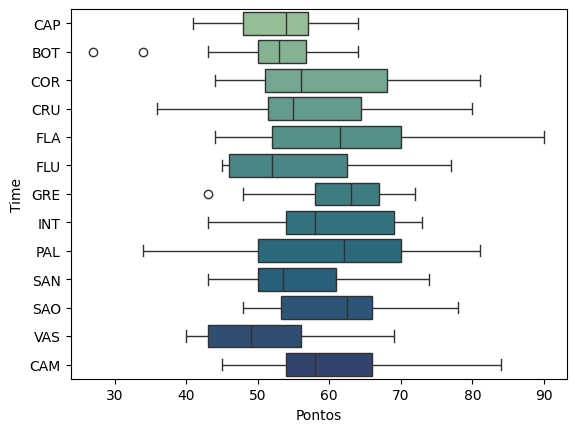

In [13]:
sns.boxplot(x="Pontos",y="Time",data=df,orient='h',palette='crest')
plt.show()

<ipython-input-14-35cb883f4208>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Aproveitamento",y="Time",data=df,orient='h',palette='viridis')


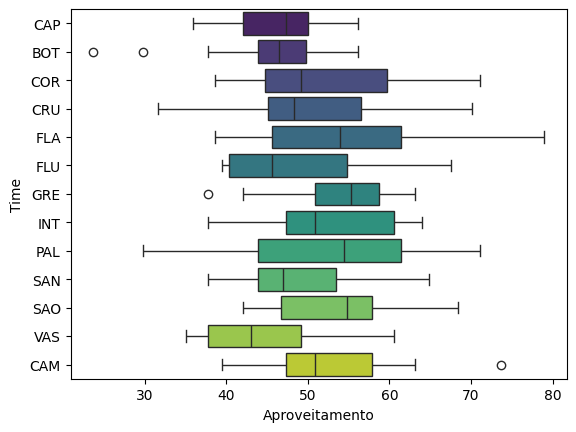

In [14]:
sns.boxplot(x="Aproveitamento",y="Time",data=df,orient='h',palette='viridis')
plt.show()

In [15]:
def sumario(formula,dataset):
  resultado=smf.ols(formula=formula, data=dataset).fit()
  print(resultado.summary())

In [16]:
def regressao(x,y,dataset,titulo):
  ax=sns.lmplot(x=x,y=y,data=dataset)
  ax.fig.suptitle(titulo,y=1.05)

In [17]:
sumario('Posicao ~ Pontos', df)

                            OLS Regression Results                            
Dep. Variable:                Posicao   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     1620.
Date:                Fri, 28 Jun 2024   Prob (F-statistic):          2.44e-102
Time:                        02:18:53   Log-Likelihood:                -423.41
No. Observations:                 218   AIC:                             850.8
Df Residuals:                     216   BIC:                             857.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.1890      0.642     51.695      0.0

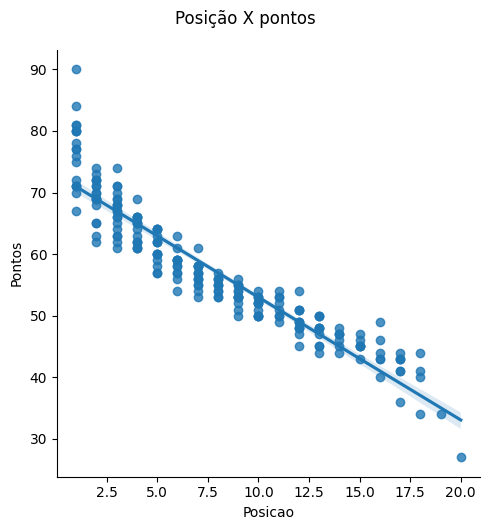

In [18]:
regressao("Posicao","Pontos",df,"Posição X pontos")

In [19]:
sumario('Vitorias ~ Pontos', df)

                            OLS Regression Results                            
Dep. Variable:               Vitorias   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     3769.
Date:                Fri, 28 Jun 2024   Prob (F-statistic):          1.05e-138
Time:                        02:18:53   Log-Likelihood:                -280.26
No. Observations:                 218   AIC:                             564.5
Df Residuals:                     216   BIC:                             571.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.3398      0.333    -13.035      0.0

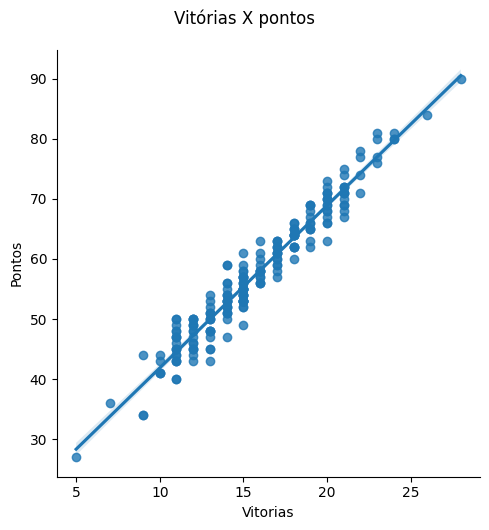

In [20]:
regressao("Vitorias","Pontos",df,"Vitórias X pontos")

In [21]:
sumario('Empates ~ Pontos', df)

                            OLS Regression Results                            
Dep. Variable:                Empates   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     8.518
Date:                Fri, 28 Jun 2024   Prob (F-statistic):            0.00389
Time:                        02:18:54   Log-Likelihood:                -519.76
No. Observations:                 218   AIC:                             1044.
Df Residuals:                     216   BIC:                             1050.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0194      0.999     13.035      0.0

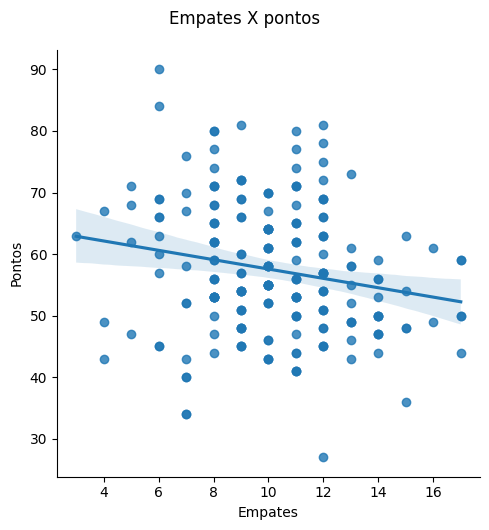

In [22]:
regressao("Empates","Pontos",df,"Empates X pontos")

In [23]:
sumario('Derrotas ~ Pontos', df)

                            OLS Regression Results                            
Dep. Variable:               Derrotas   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     692.7
Date:                Fri, 28 Jun 2024   Prob (F-statistic):           2.54e-69
Time:                        02:18:55   Log-Likelihood:                -431.37
No. Observations:                 218   AIC:                             866.7
Df Residuals:                     216   BIC:                             873.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.3204      0.666     44.033      0.0

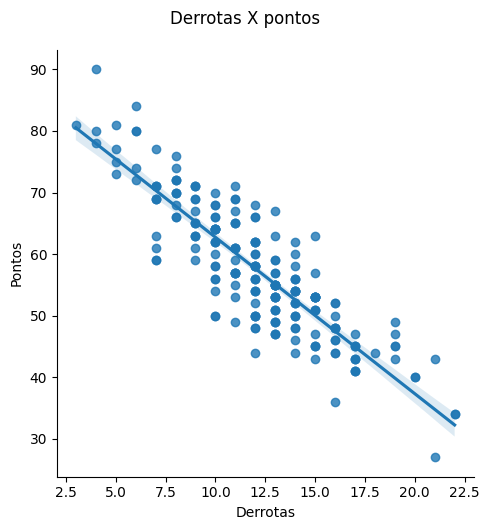

In [24]:
regressao("Derrotas","Pontos",df,"Derrotas X pontos")

In [25]:
sumario('Saldo ~ Pontos', df)

                            OLS Regression Results                            
Dep. Variable:                  Saldo   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     1249.
Date:                Fri, 28 Jun 2024   Prob (F-statistic):           9.66e-92
Time:                        02:18:56   Log-Likelihood:                -671.43
No. Observations:                 218   AIC:                             1347.
Df Residuals:                     216   BIC:                             1354.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -62.3727      2.003    -31.143      0.0

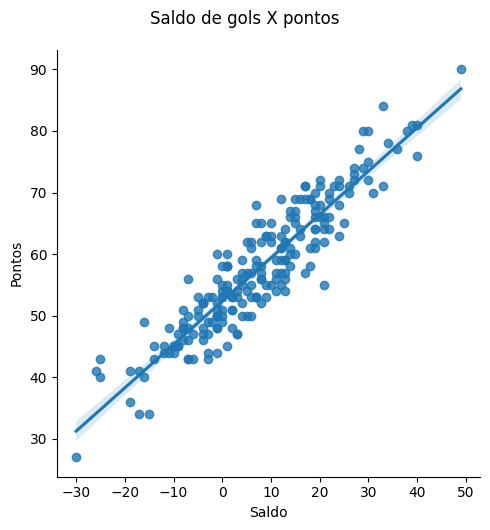

In [26]:
regressao("Saldo","Pontos",df,"Saldo de gols X pontos")

In [27]:
sumario('Aproveitamento ~ Pontos', df)

                            OLS Regression Results                            
Dep. Variable:         Aproveitamento   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.103e+09
Date:                Fri, 28 Jun 2024   Prob (F-statistic):               0.00
Time:                        02:18:57   Log-Likelihood:                 961.74
No. Observations:                 218   AIC:                            -1919.
Df Residuals:                     216   BIC:                            -1913.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0005      0.001     -0.454      0.6

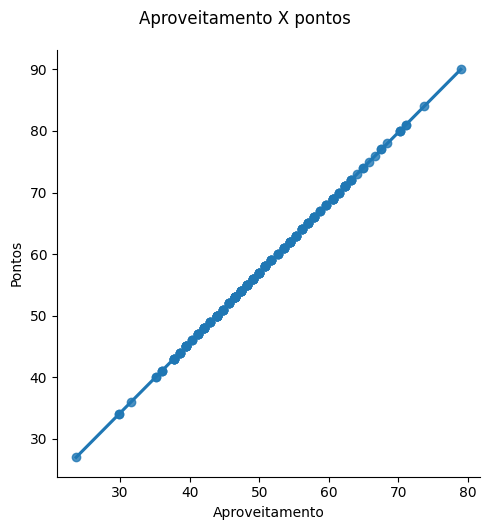

In [28]:
regressao("Aproveitamento","Pontos",df,"Aproveitamento X pontos")